# Logistic Regression

**Question:** "¿Estará dispuesto el cliente a contratar un deposito a largo plazo?"

-----------------------------------------------------------------------------------------------

**1. EDA**

In [2]:
import pandas as pd

raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
raw_data.shape

(41188, 21)

In [4]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

With this information we are able to extract some conclusions:

There are a total of 41188 rows (in this case, personal and financial data of the bank clients) and 21 columns, among which we find the target or class to predict, 'yes/no'.

**Categorial variables:** job, marital, education, default, housing, loan, contact, month, day_of_week, campaign, y.

**Numerical variables:** age, duration, pdays, previous, **poutcome**, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

Will pay special attention to some strange variables.

- Eliminte duplicates:

In [5]:
raw_data.duplicated().sum()


np.int64(12)

We have found 12 pairs of duplicate values (24 values). Will go deeper on this to find out more:

In [6]:
duplicates = raw_data[raw_data.duplicated(keep=False)]

# Display the duplicated rows:
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Given the coincidence of the data, will assume these rows reffer to the same clients so they are duplicates and will be eliminated:

In [7]:
data_no_duplicates = raw_data.drop_duplicates().reset_index(drop = True)
data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

Our dataset has been reduced from **41188 rows to 41176 rows**. We've reduced it in 24 rows.

In [8]:
data_no_duplicates_check = data_no_duplicates[data_no_duplicates.duplicated(keep=False)]
data_no_duplicates_check

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


GOOD! No duplicates 👍 :)

Also No null values.


- Eliminate irrelevant information: Given I don't have technical knowledge about the data provided, I will not delete any variables, and will wait for the ML model to select the most beneficial.

**Analysis of univariate variables**


Analysis of categorical variables:

**Categorial variables:** job, marital, education, default, housing, loan, contact, month, day_of_week, campaign, y.

**Numerical variables:** age, duration, pdays, previous, **poutcome**, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

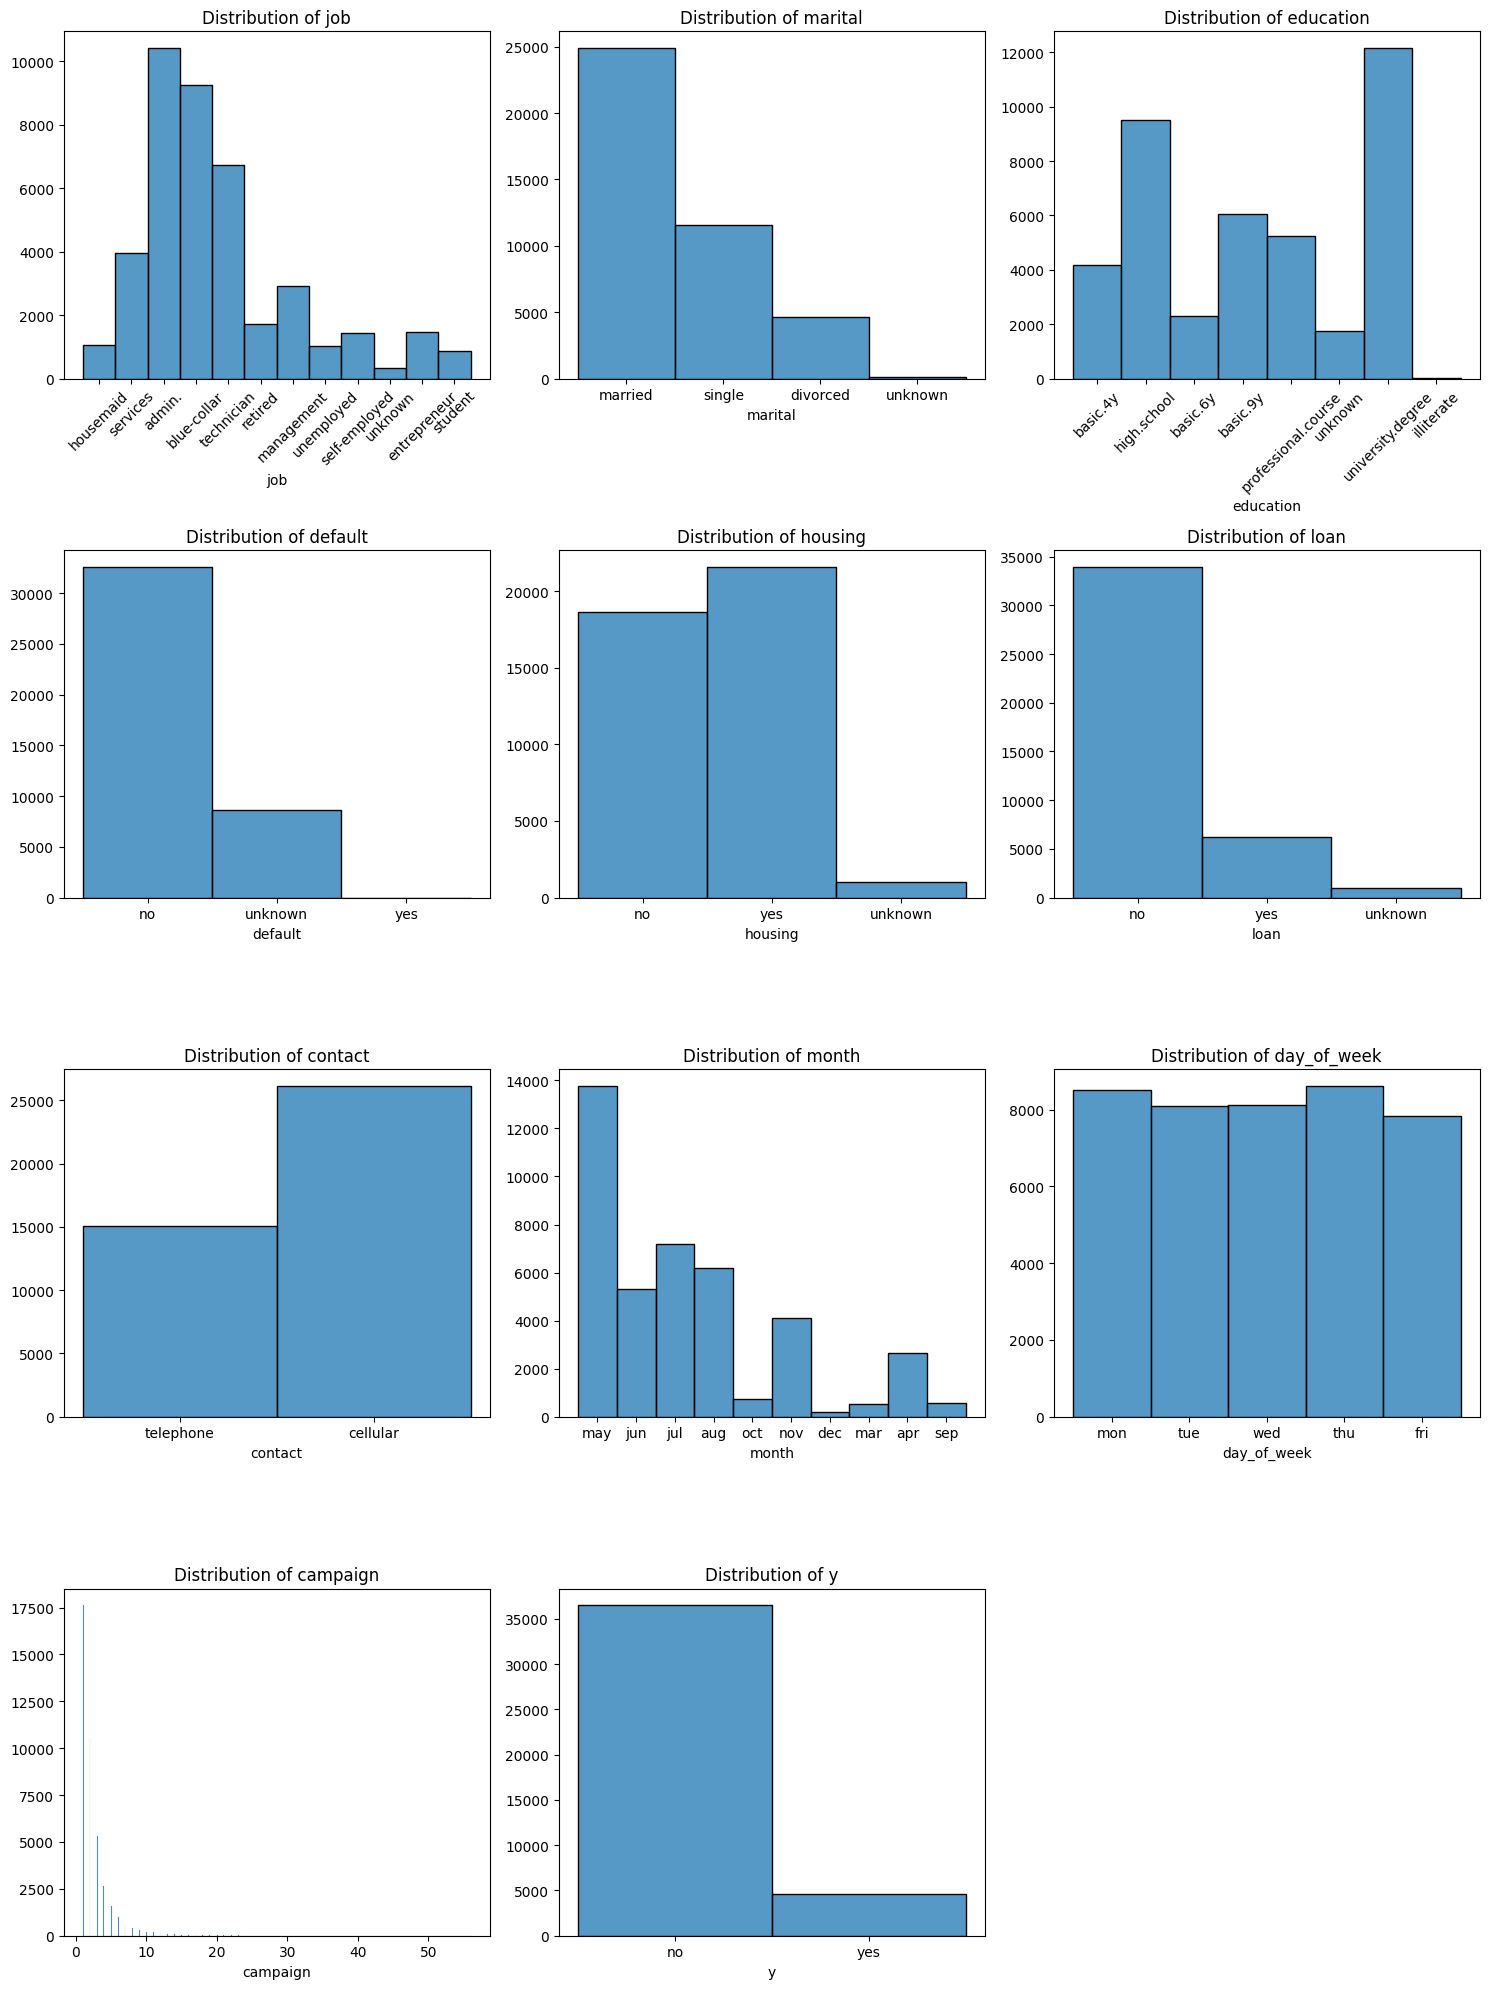

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical variables
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", 
                    "contact", "month", "day_of_week", "campaign", "y"]

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = -(-len(categorical_vars) // n_cols)  # Ceiling division for the number of rows

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easy iteration if there are multiple rows
axes = axes.flatten()

# Loop through each categorical variable and plot
for i, var in enumerate(categorical_vars):
    sns.histplot(ax=axes[i], data=data_no_duplicates, x=var).set(ylabel=None)
    axes[i].set_title(f"Distribution of {var}", fontsize=12)
    
    # Rotate the x-axis labels for 'job' and 'education' to make them more readable
    if var in ['job', 'education']:
        axes[i].tick_params(axis='x', rotation=45)

# Turn off unused axes if there are any
for j in range(len(categorical_vars), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The first graph representation of the data is very interesting and offers lots of information:
- Several variables have **"UNKNOWN"** entries.

Given the 'unknown' value is very abundant in our dataset, will review how many unknown values there are per variable ant the proportion against the variable:

In [10]:
# List of categorical variables
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", 
                    "contact", "month", "day_of_week","y"]

# Initialize an empty dictionary to store results
unknown_summary = {}

# Loop through each categorical variable
for var in categorical_vars:
    # Count the number of 'unknown' values
    unknown_count = data_no_duplicates[var].str.lower().eq('unknown').sum()
    
    # Calculate the proportion of 'unknown' values
    unknown_proportion = unknown_count / len(data_no_duplicates) * 100
    
    # Store results in the dictionary
    unknown_summary[var] = {
        'Unknown Count': unknown_count,
        'Proportion (%)': round(unknown_proportion, 2)
    }

# Convert the summary dictionary into a DataFrame for better visualization
unknown_summary_df = pd.DataFrame.from_dict(unknown_summary, orient='index')

# Display the summary DataFrame
print(unknown_summary_df)

             Unknown Count  Proportion (%)
job                    330            0.80
marital                 80            0.19
education             1730            4.20
default               8596           20.88
housing                990            2.40
loan                   990            2.40
contact                  0            0.00
month                    0            0.00
day_of_week              0            0.00
y                        0            0.00


In [11]:
# Select only the categorical variables
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", 
                    "contact", "month", "day_of_week", "campaign", "y"]

# Create a new column in the DataFrame to count the number of 'unknown' values per row
data_no_duplicates['unknown_count'] = data_no_duplicates[categorical_vars].apply(
    lambda row: row.str.lower().eq('unknown').sum(), axis=1
)

# Display summary of the 'unknown_count' column
unknown_summary_per_client = data_no_duplicates['unknown_count'].value_counts().sort_index()

# Print the summary
print("Number of 'unknown' values per client:")
print(unknown_summary_per_client)

Number of 'unknown' values per client:
unknown_count
0    30478
1     9032
2     1338
3      306
4       20
5        2
Name: count, dtype: int64


The proportion of 'unknown' values per client is the following:

0   -   74  %

1   -   22  %

2   -   3   %

3   -   0,7 %

4   -   0,1 %

5   -   0,01%

- This means that the clients with 0 and 1 unknown are the 96% of my dataset. Hence, by deleting only the 4% of my dataset, I can have a high quality data. Now will identify the clients with 2, 3, 4 and 5 'unknown's and delete them.


In [12]:
# Define the exact counts of 'unknown' values you want to filter
specific_unknown_counts = [2, 3, 4, 5]

# Filter the dataset for clients with the specified counts of 'unknown' values
clients_with_specific_unknowns = data_no_duplicates[data_no_duplicates['unknown_count'].isin(specific_unknown_counts)]

# Display the filtered dataset
print("Clients with exactly 2, 3, 4, or 5 'unknown' values:")
print(clients_with_specific_unknowns)

# If you want a breakdown for each count, group and display
for count in specific_unknown_counts:
    print(f"\nClients with exactly {count} 'unknown' values:")
    print(data_no_duplicates[data_no_duplicates['unknown_count'] == count])

Clients with exactly 2, 3, 4, or 5 'unknown' values:
       age          job   marital            education  default  housing  \
7       41  blue-collar   married              unknown  unknown       no   
10      41  blue-collar   married              unknown  unknown       no   
29      55      unknown   married    university.degree  unknown  unknown   
35      55      unknown   married             basic.4y  unknown      yes   
73      57      unknown   married              unknown  unknown       no   
...    ...          ...       ...                  ...      ...      ...   
41002   31   technician    single  professional.course       no  unknown   
41003   34       admin.  divorced    university.degree       no  unknown   
41017   46   management   married    university.degree       no  unknown   
41096   64      unknown   married              unknown       no       no   
41103   42     services  divorced    university.degree       no  unknown   

          loan    contact month da

Will remove clients with 2, 3, 4, 5 'unkown' values:

In [13]:
# Define the counts of 'unknown' values to filter out
specific_unknown_counts = [2, 3, 4, 5]

# Filter out clients with exactly 2, 3, 4, or 5 'unknown' values
data_no_duplicates_no_unknown = data_no_duplicates[~data_no_duplicates['unknown_count'].isin(specific_unknown_counts)]

# Drop the 'unknown_count' column since it might not be needed anymore
data_no_duplicates_no_unknown = data_no_duplicates_no_unknown.drop(columns=['unknown_count'])

# Display the shape and head of the new dataset
print("New dataset after removing specific clients:")
print(data_no_duplicates_no_unknown.shape)
print(data_no_duplicates_no_unknown.head())

New dataset after removing specific clients:
(39510, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   


In [14]:
data_no_duplicates_no_unknown.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

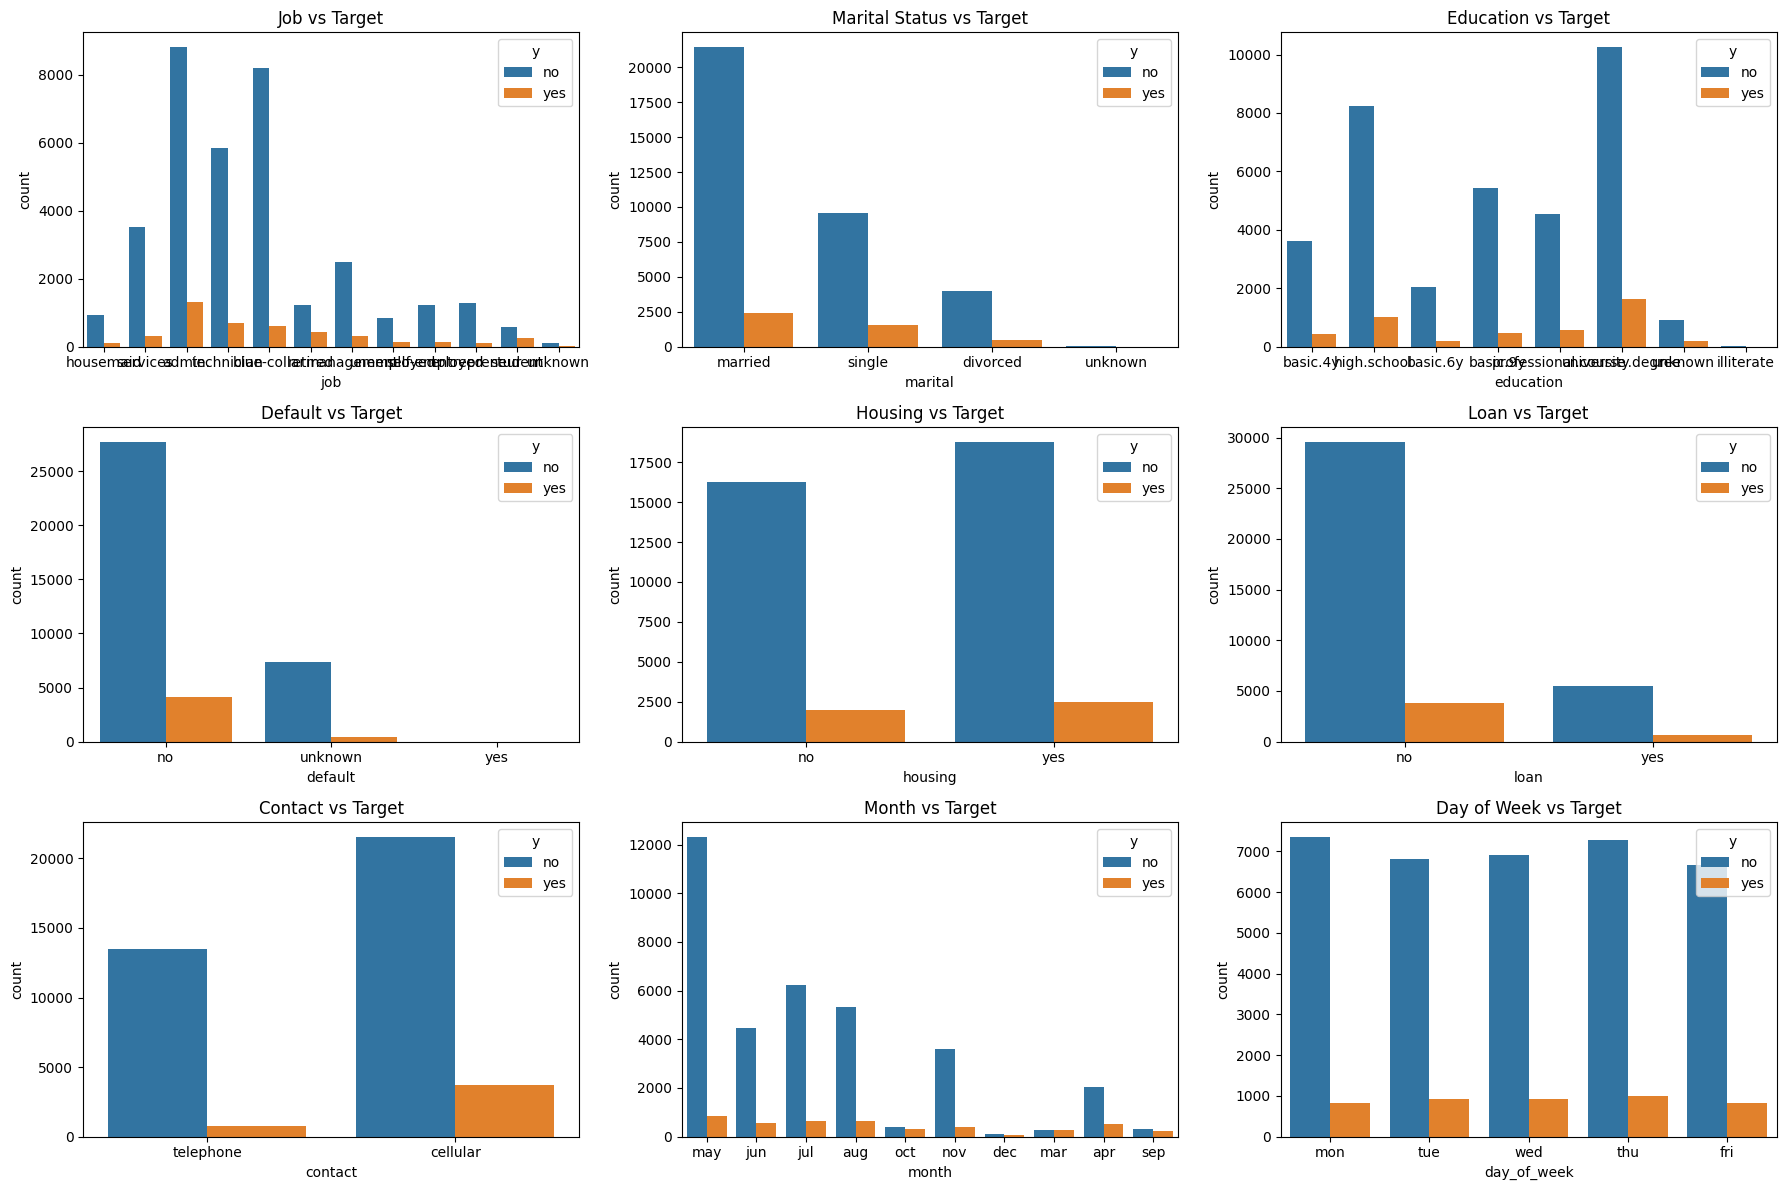

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and axes
fig, axis = plt.subplots(3, 3, figsize=(18, 12))

# Create count plots for categorical variables
sns.countplot(ax=axis[0, 0], data=data_no_duplicates_no_unknown, x="job", hue="y").set(title="Job vs Target")
sns.countplot(ax=axis[0, 1], data=data_no_duplicates_no_unknown, x="marital", hue="y").set(title="Marital Status vs Target")
sns.countplot(ax=axis[0, 2], data=data_no_duplicates_no_unknown, x="education", hue="y").set(title="Education vs Target")
sns.countplot(ax=axis[1, 0], data=data_no_duplicates_no_unknown, x="default", hue="y").set(title="Default vs Target")
sns.countplot(ax=axis[1, 1], data=data_no_duplicates_no_unknown, x="housing", hue="y").set(title="Housing vs Target")
sns.countplot(ax=axis[1, 2], data=data_no_duplicates_no_unknown, x="loan", hue="y").set(title="Loan vs Target")
sns.countplot(ax=axis[2, 0], data=data_no_duplicates_no_unknown, x="contact", hue="y").set(title="Contact vs Target")
sns.countplot(ax=axis[2, 1], data=data_no_duplicates_no_unknown, x="month", hue="y").set(title="Month vs Target")
sns.countplot(ax=axis[2, 2], data=data_no_duplicates_no_unknown, x="day_of_week", hue="y").set(title="Day of Week vs Target")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

- We can notice the positive trend in between certain jobs and the target variable.
- I can observe some possitive correlation with the education, and marital status too.

**Factorisation:** Now lets factorise all the categorical variables:

In [16]:
# Factorize all categorical variables
data_no_duplicates_no_unknown["job_n"] = pd.factorize(data_no_duplicates_no_unknown["job"])[0]
data_no_duplicates_no_unknown["marital_n"] = pd.factorize(data_no_duplicates_no_unknown["marital"])[0]
data_no_duplicates_no_unknown["education_n"] = pd.factorize(data_no_duplicates_no_unknown["education"])[0]
data_no_duplicates_no_unknown["default_n"] = pd.factorize(data_no_duplicates_no_unknown["default"])[0]
data_no_duplicates_no_unknown["housing_n"] = pd.factorize(data_no_duplicates_no_unknown["housing"])[0]
data_no_duplicates_no_unknown["loan_n"] = pd.factorize(data_no_duplicates_no_unknown["loan"])[0]
data_no_duplicates_no_unknown["contact_n"] = pd.factorize(data_no_duplicates_no_unknown["contact"])[0]
data_no_duplicates_no_unknown["month_n"] = pd.factorize(data_no_duplicates_no_unknown["month"])[0]
data_no_duplicates_no_unknown["day_of_week_n"] = pd.factorize(data_no_duplicates_no_unknown["day_of_week"])[0]
data_no_duplicates_no_unknown["campaign_n"] = pd.factorize(data_no_duplicates_no_unknown["campaign"])[0]
data_no_duplicates_no_unknown["y_n"] = pd.factorize(data_no_duplicates_no_unknown["y"])[0]

# Drop the original categorical variables
columns_to_drop = ["job", "marital", "education", "default", "housing", 
                   "loan", "contact", "month", "day_of_week", "campaign", "y"]

data_no_duplicates_no_unknown_factorised = data_no_duplicates_no_unknown.drop(columns=columns_to_drop)

# Rename the dataset to keep only numerical and factorized variables
print("New dataset columns:", data_no_duplicates_no_unknown_factorised.columns)

# Verify the structure of the new dataset
data_no_duplicates_no_unknown_factorised.head()

New dataset columns: Index(['age', 'duration', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_n',
       'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'campaign_n', 'y_n'],
      dtype='object')


,age,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,campaign_n,y_n
0,56,261,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,...,0,1,1,0,0,0,0,0,0,0
2,37,226,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,1,0,0,0,0,0,0
3,40,151,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,...,0,2,0,0,0,0,0,0,0,0
4,56,307,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,0,0,0,0,0


The variable **'poutcome' is very suspicious**. Will explore it:

In [17]:
# Display unique values in the 'poutcome' column
unique_poutcome = data_no_duplicates_no_unknown_factorised['poutcome'].unique()
print("Unique groups in 'poutcome':", unique_poutcome)

# Alternatively, display the count of each group
poutcome_counts = data_no_duplicates_no_unknown_factorised['poutcome'].value_counts()
print("\nCounts of each group in 'poutcome':\n", poutcome_counts)

Unique groups in 'poutcome': ['nonexistent' 'failure' 'success']

Counts of each group in 'poutcome':
 poutcome
nonexistent    34068
failure         4107
success         1335
Name: count, dtype: int64


- Most of the values within the variable are 'nonexistent'. Then the variable doesn't seem to offer great information, therefore **will drop 'poutcome'** from the dataset:

In [18]:
data_no_duplicates_no_unknown_factorised_cleaned = data_no_duplicates_no_unknown_factorised.drop('poutcome', axis=1)

# Confirm the variable has been dropped
print("Columns in the new dataset:\n", data_no_duplicates_no_unknown_factorised_cleaned.columns)

Columns in the new dataset:
 Index(['age', 'duration', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_n',
       'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'campaign_n', 'y_n'],
      dtype='object')


- Numerical-categorical analysis (complete):


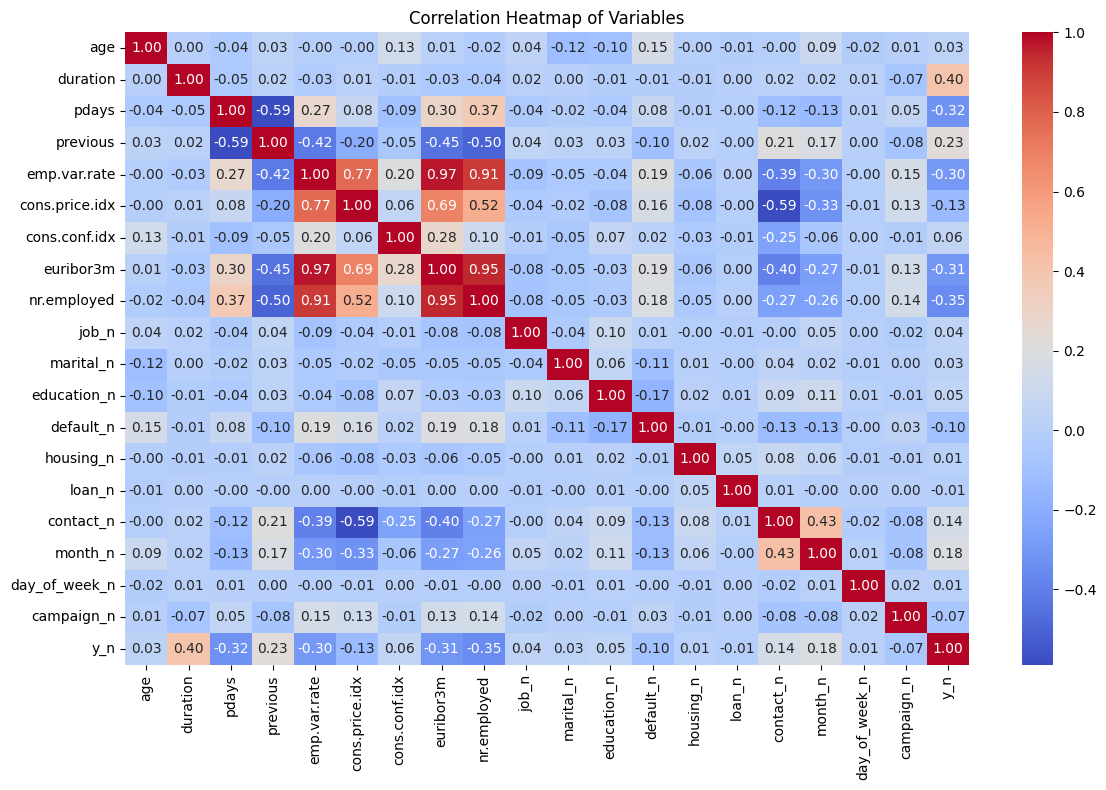

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap for the cleaned dataset
fig, axis = plt.subplots(figsize=(12, 8))

sns.heatmap(
    data_no_duplicates_no_unknown_factorised_cleaned.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)

plt.title("Correlation Heatmap of Variables")
plt.tight_layout()

plt.show()

**Feature engineering**


In [20]:
final_data = data_no_duplicates_no_unknown_factorised_cleaned

final_data.describe()

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,campaign_n,y_n
count,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000,39510.000000
mean,39.913364,258.778967,962.080081,0.174234,0.069431,93.569681,-40.519529,3.607990,5166.600972,3.648266,0.510909,2.984738,0.196457,0.537358,0.155707,0.639307,2.266059,1.979954,1.584789,0.113541
std,10.395712,259.744202,187.881788,0.495967,1.573247,0.578378,4.640698,1.737804,72.415851,2.288949,0.694908,1.871683,0.397514,0.498609,0.362582,0.480208,2.435122,1.411241,2.908883,0.317257
min,17.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,180.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000
75%,47.000000,320.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,5.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,2.000000,0.000000
max,98.000000,4918.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,1.000000,1.000000,1.000000,9.000000,4.000000,40.000000,1.000000


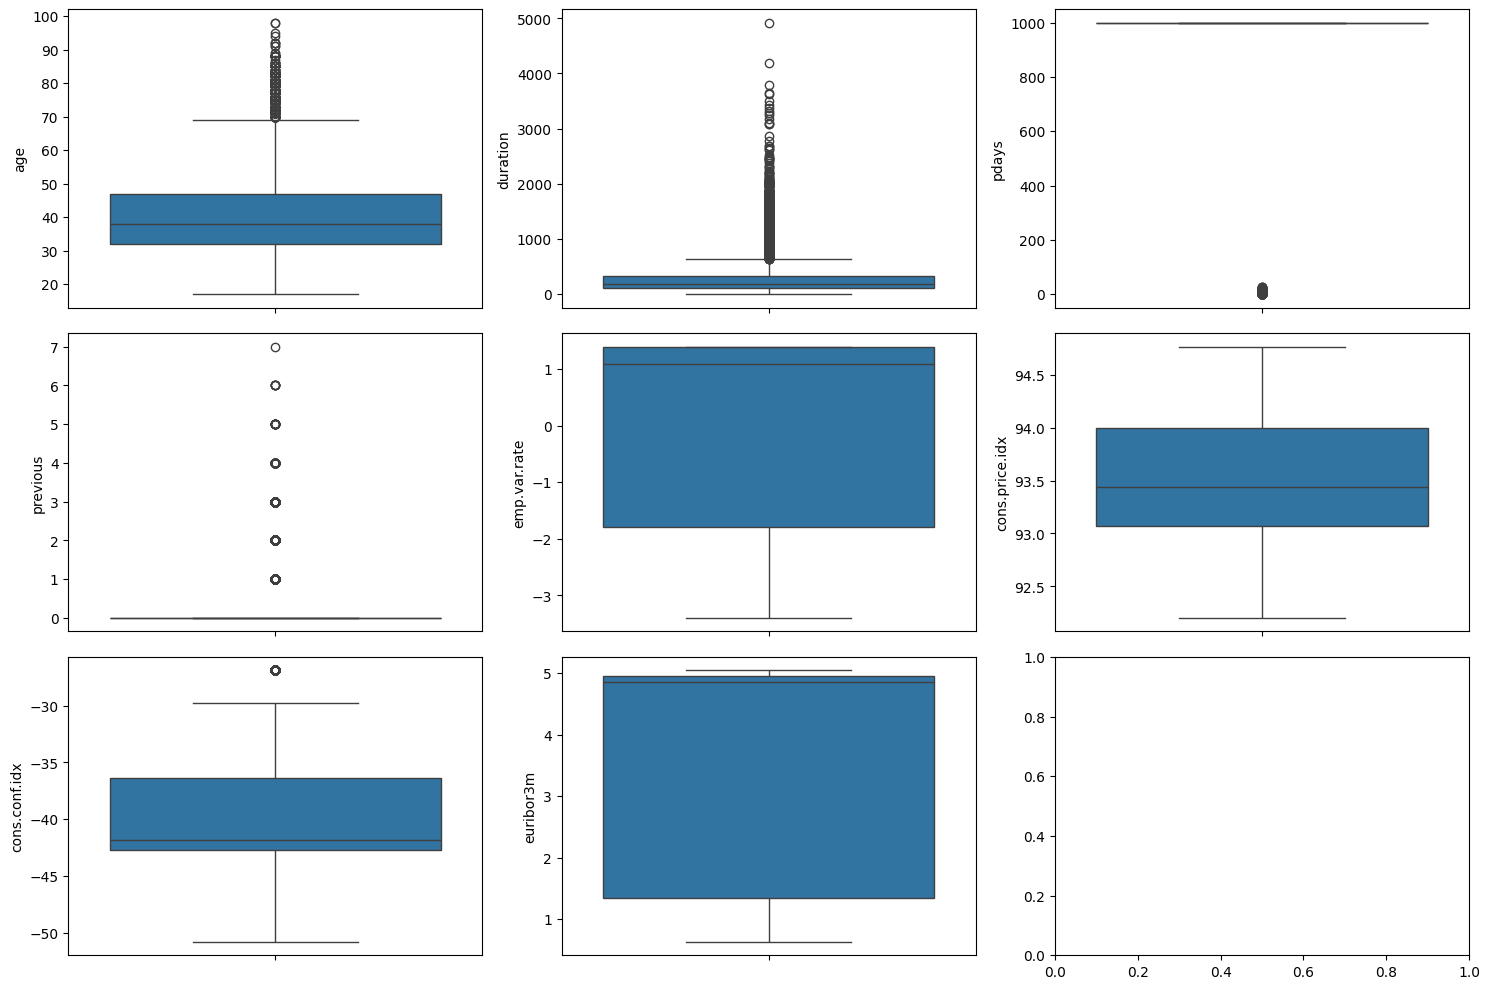

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize=(15, 10))

# Plotting boxplots for different variables in final_data
sns.boxplot(ax=axis[0, 0], data=final_data, y="age")
sns.boxplot(ax=axis[0, 1], data=final_data, y="duration")
sns.boxplot(ax=axis[0, 2], data=final_data, y="pdays")
sns.boxplot(ax=axis[1, 0], data=final_data, y="previous")
sns.boxplot(ax=axis[1, 1], data=final_data, y="emp.var.rate")
sns.boxplot(ax=axis[1, 2], data=final_data, y="cons.price.idx")
sns.boxplot(ax=axis[2, 0], data=final_data, y="cons.conf.idx")
sns.boxplot(ax=axis[2, 1], data=final_data, y="euribor3m")

plt.tight_layout()

plt.show()

Will explore 'age' and 'duration' for outliers:

In [22]:
# Calculate the IQR for 'age' and 'duration'
age_stats = final_data["age"].describe()
duration_stats = final_data["duration"].describe()

# Calculate IQR for 'age'
age_iqr = age_stats["75%"] - age_stats["25%"]
age_upper_limit = age_stats["75%"] + 1.5 * age_iqr
age_lower_limit = age_stats["25%"] - 1.5 * age_iqr

# Calculate IQR for 'duration'
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
duration_upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
duration_lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

# Print the outlier limits for 'age' and 'duration'
print(f"The upper and lower limits for 'age' outliers are {round(age_upper_limit, 2)} and {round(age_lower_limit, 2)}, with an IQR of {round(age_iqr, 2)}")
print(f"The upper and lower limits for 'duration' outliers are {round(duration_upper_limit, 2)} and {round(duration_lower_limit, 2)}, with an IQR of {round(duration_iqr, 2)}")

The upper and lower limits for 'age' outliers are 69.5 and 9.5, with an IQR of 15.0
The upper and lower limits for 'duration' outliers are 645.5 and -222.5, with an IQR of 217.0


In [23]:
# Count the number of data points above and below the limits for 'age'
age_outliers_above = final_data[final_data["age"] > age_upper_limit]
age_outliers_below = final_data[final_data["age"] < age_lower_limit]

# Count the number of data points above and below the limits for 'duration'
duration_outliers_above = final_data[final_data["duration"] > duration_upper_limit]
duration_outliers_below = final_data[final_data["duration"] < duration_lower_limit]

# Print the number of outliers
print(f"Number of 'age' values above the upper limit: {age_outliers_above.shape[0]}")
print(f"Number of 'age' values below the lower limit: {age_outliers_below.shape[0]}")

print(f"Number of 'duration' values above the upper limit: {duration_outliers_above.shape[0]}")
print(f"Number of 'duration' values below the lower limit: {duration_outliers_below.shape[0]}")

Number of 'age' values above the upper limit: 448
Number of 'age' values below the lower limit: 0
Number of 'duration' values above the upper limit: 2845
Number of 'duration' values below the lower limit: 0


In [24]:
# Calculate the proportion of outliers above the upper limit for 'age'
age_outliers_above_proportion = age_outliers_above.shape[0] / final_data.shape[0]

# Calculate the proportion of outliers below the lower limit for 'age'
age_outliers_below_proportion = age_outliers_below.shape[0] / final_data.shape[0]

# Calculate the proportion of outliers above the upper limit for 'duration'
duration_outliers_above_proportion = duration_outliers_above.shape[0] / final_data.shape[0]

# Calculate the proportion of outliers below the lower limit for 'duration'
duration_outliers_below_proportion = duration_outliers_below.shape[0] / final_data.shape[0]

# Print the proportions
print(f"Proportion of 'age' values above the upper limit: {round(age_outliers_above_proportion, 4)}")
print(f"Proportion of 'age' values below the lower limit: {round(age_outliers_below_proportion, 4)}")

print(f"Proportion of 'duration' values above the upper limit: {round(duration_outliers_above_proportion, 4)}")
print(f"Proportion of 'duration' values below the lower limit: {round(duration_outliers_below_proportion, 4)}")

Proportion of 'age' values above the upper limit: 0.0113
Proportion of 'age' values below the lower limit: 0.0
Proportion of 'duration' values above the upper limit: 0.072
Proportion of 'duration' values below the lower limit: 0.0


- The number of outliers in 'age' are the 1.13 % off the data. Hence they can be deleted.

- The number of outliers in 'duration' are the 7,2 % % off the data. Hence they can NOT be deleted.


In [25]:
# Remove outliers for the 'age' variable based on the calculated limits
final_data_cleaned = final_data[
    (final_data["age"] <= age_upper_limit) & (final_data["age"] >= age_lower_limit)
]

# Verify the result by checking the first few rows of the cleaned dataset
final_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39062 entries, 0 to 41174
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39062 non-null  int64  
 1   duration        39062 non-null  int64  
 2   pdays           39062 non-null  int64  
 3   previous        39062 non-null  int64  
 4   emp.var.rate    39062 non-null  float64
 5   cons.price.idx  39062 non-null  float64
 6   cons.conf.idx   39062 non-null  float64
 7   euribor3m       39062 non-null  float64
 8   nr.employed     39062 non-null  float64
 9   job_n           39062 non-null  int64  
 10  marital_n       39062 non-null  int64  
 11  education_n     39062 non-null  int64  
 12  default_n       39062 non-null  int64  
 13  housing_n       39062 non-null  int64  
 14  loan_n          39062 non-null  int64  
 15  contact_n       39062 non-null  int64  
 16  month_n         39062 non-null  int64  
 17  day_of_week_n   39062 non-null  int6

- **Normalisation**

Before normalisation will **divide the set into train and test**:

In [26]:
from sklearn.model_selection import train_test_split

# Define the numerical variables (adjust this list based on the actual columns)
num_variables = [
    "age", "duration", "pdays", "previous", "emp.var.rate", "cons.price.idx", 
    "cons.conf.idx", "euribor3m", "nr.employed", "job_n", "marital_n", 
    "education_n", "default_n", "housing_n", "loan_n", "contact_n", 
    "month_n", "day_of_week_n", "campaign_n", "y_n"
]

# Ensure we have all the required columns
X = final_data_cleaned[num_variables].drop("y_n", axis=1)  # Exclude target variable 'y_n'
Y = final_data_cleaned["y_n"]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the first few rows of the training data
X_train.head()

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,campaign_n
26208,37,667,999,0,-0.1,93.200,-42.0,4.076,5195.8,1,2,2,0,0,0,1,5,3,1
39179,27,219,999,0,-1.8,93.369,-34.8,0.653,5008.7,10,1,1,0,0,0,1,7,4,0
801,47,421,999,0,1.1,93.994,-36.4,4.856,5191.0,1,2,1,0,0,0,0,0,2,0
36743,44,234,3,1,-2.9,92.963,-40.8,1.286,5076.2,8,0,5,0,0,0,1,1,1,1
36924,36,185,999,0,-2.9,92.963,-40.8,1.099,5076.2,9,1,0,0,0,0,1,1,1,0


We do the normalisation now:

In [27]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaler.fit(X_train)

# Apply the transformation to the training data:
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

# Apply the transformation to the test data
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

# Display the first few rows of the transformed training data
X_train_norm.head()

,age,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,campaign_n
26208,-0.255349,1.548397,0.189656,-0.346441,-0.126294,-0.652515,-0.306773,0.254508,0.388147,-1.147044,2.156724,-0.534405,-0.495706,-1.077111,-0.430088,0.755862,1.138474,0.720068,-0.202548
39179,-1.294228,-0.156561,0.189656,-0.346441,-1.218881,-0.357762,1.265906,-1.733200,-2.244676,2.759136,0.710469,-1.071145,-0.495706,-1.077111,-0.430088,0.755862,1.963831,1.428618,-0.544512
801,0.783529,0.612192,0.189656,-0.346441,0.644945,0.732302,0.916422,0.707447,0.320603,-1.147044,2.156724,-1.071145,-0.495706,-1.077111,-0.430088,-1.322992,-0.924918,0.011519,-0.544512
36743,0.471865,-0.099475,-5.289499,1.747552,-1.925850,-1.065867,-0.044660,-1.365622,-1.294833,1.891096,-0.735785,1.075817,-0.495706,-1.077111,-0.430088,0.755862,-0.512239,-0.697031,-0.202548
36924,-0.359237,-0.285955,0.189656,-0.346441,-1.925850,-1.065867,-0.044660,-1.474212,-1.294833,2.325116,0.710469,-1.607886,-0.495706,-1.077111,-0.430088,0.755862,-0.512239,-0.697031,-0.544512


- We apply the selection model **Chi_2**:

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

# Ensure all values are non-negative (chi-square requires non-negative inputs)
X_train_norm_non_negative = X_train_norm + abs(X_train_norm.min().min())
X_test_norm_non_negative = X_test_norm + abs(X_test_norm.min().min())

# Apply SelectKBest with chi-square
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train_norm_non_negative, Y_train)

# Get the selected feature indices
ix = selection_model.get_support()

# Create DataFrames for the selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm_non_negative), 
                           columns=X_train_norm.columns.values[ix], index=X_train_norm.index)
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm_non_negative), 
                          columns=X_test_norm.columns.values[ix], index=X_test_norm.index)

# Display the first few rows of the selected training data
X_train_sel.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
26208,6.854399,5.495658,5.179708,5.560510,5.694149
39179,5.149441,5.495658,4.087121,3.572802,3.061326
801,5.918195,5.495658,5.950947,6.013449,5.626605
36743,5.206527,0.016503,3.380152,3.940380,4.011169
36924,5.020047,5.495658,3.380152,3.831791,4.011169


**Saving the train and test dataframes:**

In [33]:
# Add the target variable to the selected feature DataFrames
X_train_sel["y_n"] = Y_train.values
X_test_sel["y_n"] = Y_test.values

# Save the training and testing datasets as CSV files
X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

print("Training and testing datasets saved successfully!")

Training and testing datasets saved successfully!


- **Preparation:** Calling out my datasets and preparing them for the model:

In [32]:
import pandas as pd

# Load the train and test datasets
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

# Prepare the features (X) and target (y)
X_train = train_data.drop(["y_n"], axis=1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis=1)
y_test = test_data["y_n"]

print("Train and test datasets successfully loaded and prepared!")

Train and test datasets successfully loaded and prepared!


**Applying the Logistic Regression Model:**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)  # Add random_state for reproducibility
model.fit(X_train, y_train)

print("Logistic Regression model successfully trained!")

Logistic Regression model successfully trained!


**Model evaluation:**

After fitting the model, we evaluate its performance using X_test and y_test:

In [36]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.4f}")

Accuracy of the logistic regression model: 0.9107


**THIS IS A FANTASTIC RESULT 😃🙌!! WE CAN EXPLAIN 91,1 % OF OUR VARIANCE**

Confusion Matrix:

The confusion matrix gives a detailed view of the model's performance in terms of true positives, true negatives, false positives, and false negatives.

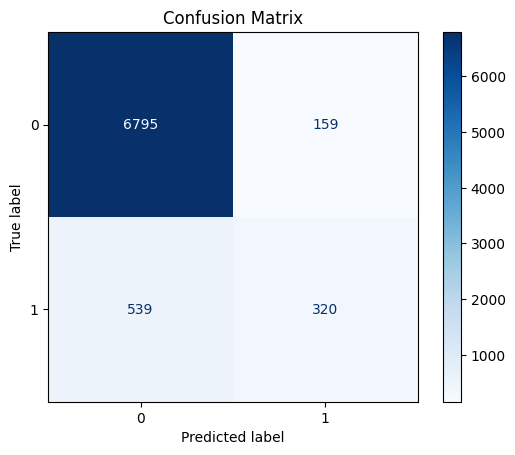

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix")
plt.show()

**Key Insights**

Strengths:

- The model performs better at identifying positive cases (recall = 85%) compared to identifying negative cases (specificity = 70%).
High recall is useful if false negatives are costly (e.g., missing clients likely to respond to a bank offer).

Weaknesses:

- Precision (73.9%) shows that a significant proportion of the predicted positives are actually incorrect, which could be costly depending on the application (e.g., offering loans to unqualified clients).

Recommendation:

- Depending on your business objective:
If missing positive cases (false negatives) is more costly, this model is already doing well with a high recall.
If false positives are more problematic, consider tweaking the decision threshold or further optimizing the model.

ROC Curve:

The Receiver Operating Characteristic (ROC) curve evaluates the model’s ability to discriminate between classes.

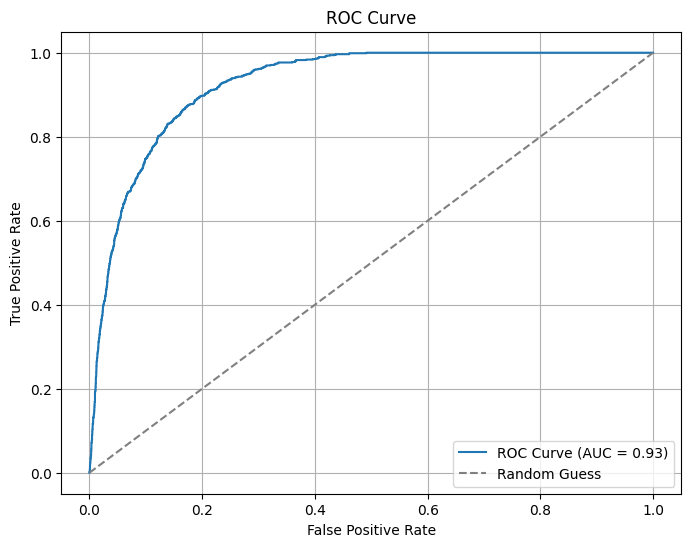

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Hyperparameter Optimization:

Optimize the logistic regression model using grid search for hyperparameter tuning.


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    "penalty": ["l1", "l2"],       # Regularization type (l1 for Lasso, l2 for Ridge)
    "solver": ["liblinear", "saga"]  # Solvers compatible with l1 and l2
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1
)

# Perform the search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


**Evaluating the Optimized Model**

Once you have the best parameters, evaluate the improved model.

In [53]:
# Train and predict with the best model
best_model.fit(X_train, y_train)
y_pred_optimized = best_model.predict(X_test)

# Evaluate accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized:.2f}")

# Compare with the original model
improvement = accuracy_optimized - accuracy
print(f"Accuracy Improvement: {improvement:.4f}")

Optimized Model Accuracy: 0.91
Accuracy Improvement: -0.0003


THE MODEL DIDN'T IMPROVE A LOT HITH THE HYPERPARAMETERS.


THE MODEL PREDICTS WELL